In [1]:
# Data Pre-processing Step:

# The data pre-processing step will remain the same as in previous regression models, except for some changes.
# In the Polynomial Regression model, we will not use feature scaling, and also we will not split our dataset 
# into training and test set. It has two reasons:

# 1. The dataset contains very less information which is not suitable to divide it into a test and training set, 
#    else our model will not be able to find the correlations between the salaries and levels.

# 2. In this model, we want very accurate predictions for salary, so the model should have enough information.

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [2]:
# we have imported the dataset 'Position_Salaries.csv', which contains three columns (Position, Levels, and Salary), 
# but we will consider only two columns (Salary and Levels).
data = pd.read_csv("Position_Salaries.csv")
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
real_x = data.iloc[:,1].values  # real_x = data.iloc[:, 1:2].values  
real_x = real_x.reshape(-1,1)
real_x

# we have extracted the dependent(Y) and independent variable(X) from the dataset. For x-variable, 
# we have taken parameters as [:,1:2], because we want 1 index(levels), and included :2 to make it as a matrix.

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [4]:
real_y = data.iloc[:,2].values
real_y = real_y.reshape(-1,1)
real_y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [5]:
# we don't splitt this data set.. because in this dataset we have only 10 Observations

In [6]:
# Now, we will build and fit the Linear regression model to the dataset. In building polynomial regression, 
# we will take the Linear regression model as reference and compare both the results. The code is given below:

linear_reg = LinearRegression()

In [7]:
linear_reg.fit(real_x,real_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Now we will build the Polynomial Regression model, but it will be a little different from the Simple Linear model. 
# Because here we will use PolynomialFeatures class of preprocessing library. We are using this class to add some 
# extra features to our dataset.

polynomial_reg = PolynomialFeatures(degree=4)
real_x_poly = polynomial_reg.fit_transform(real_x)
real_x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [9]:
polynomial_reg.fit(real_x_poly,real_y)
linear_reg2 = LinearRegression()
linear_reg2.fit(real_x_poly,real_y)

# In the above lines of code, we have used ----->  polynomial_reg.fit_transform(real_x), 
# because first we are converting our feature matrix into polynomial feature matrix, and then fitting it to the
# Polynomial regression model. The parameter value(degree= 2) depends on our choice. 
# We can choose it according to our Polynomial features.

# Next, we have used another LinearRegression object, namely linear_reg2, to fit our real_x_poly vector to the linear model.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

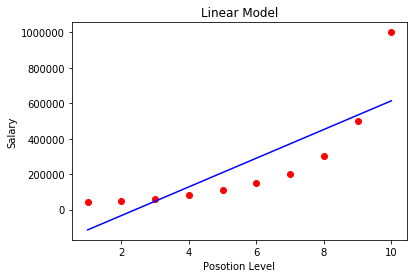

In [10]:
plt.scatter(real_x,real_y,color="red")
plt.plot(real_x,linear_reg.predict(real_x),color="blue")
plt.title("Linear Model")
plt.xlabel("Posotion Level")
plt.ylabel("Salary")
plt.show()

In [11]:
# In the above output image, we can clearly see that the regression line is so far from the datasets. 
# Predictions are in a red straight line, and blue points are actual values. If we consider this output to predict 
# the value of CEO, it will give a salary of approx. 600000$, which is far away from the real value.

# So we need a curved model to fit the dataset other than a straight line.

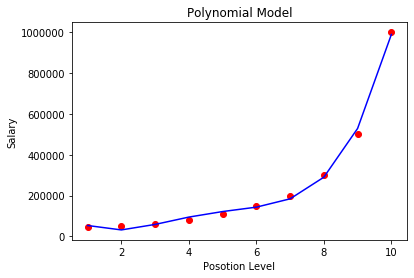

In [12]:
# Here we will visualize the result of Polynomial regression model, code for which is little different from the above model.
plt.scatter(real_x,real_y,color="red")
plt.plot(real_x,linear_reg2.predict(real_x_poly),color="blue")
plt.title("Polynomial Model")
plt.xlabel("Posotion Level")
plt.ylabel("Salary")
plt.show()

# In the above code, we have taken linear_reg2.predict(polynomial_reg.fit_transform(real_x), instead of real_x_poly, 
# because we want a Linear regressor object to predict the polynomial features matrix.


#----> To fit this line chenge the value of degree

In [13]:
# Predicting the final result with the Linear Regression model:
# Now, we will predict the final output using the Linear regression model to see whether an employee is saying truth 
# or bluff. So, for this, we will use the predict() method and will pass the value 6.5. Below is the code for it:

linear_reg.predict([[6.5]])

array([[330378.78787879]])

In [14]:
# Predicting the final result with the Polynomial Regression model:
# Now, we will predict the final output using the Polynomial Regression model to compare with Linear model.
# Below is the code for it:
    
linear_reg2.predict(polynomial_reg.fit_transform([[6.5]]))

array([[158862.45265153]])

# As we can see, the predicted output for the Polynomial Regression is [158862.45265153], which is much closer to real value hence, we can say that future employee is saying true.